<a href="https://colab.research.google.com/github/vkb27/MLnow_2.0/blob/main/UnivariateReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [9]:
cd '/content/drive/MyDrive/Coding/EDA/student'

/content/drive/MyDrive/Coding/EDA/student


In [20]:
porData= pd.read_csv('student-por.csv', sep=';')

In [21]:
porData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

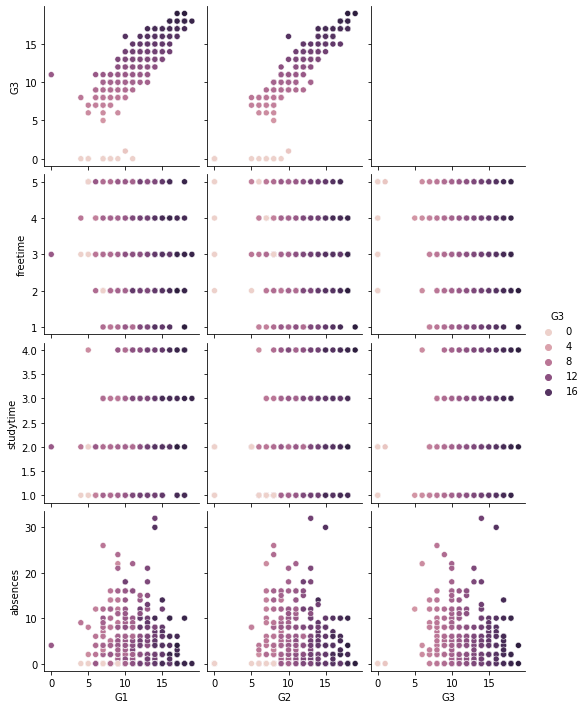

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(porData,
             y_vars = [ 'G3', 'freetime', 'studytime', 'absences'],
             x_vars = ['G1', 'G2','G3'],diag_kind='kde', hue='G3',
)

For univariate regression choosing two parameters G1 and G3 
(acc. to graph the target attribute G3 has a strong correlation with attributes G2 and G1)


---

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [28]:
uniporData = porData[['G1','G3']]
uniporData.head()

,G1,G3
0,0,11
1,9,11
2,12,12
3,14,14
4,11,13


In [29]:
uniporData.to_csv('PorData_2.csv')

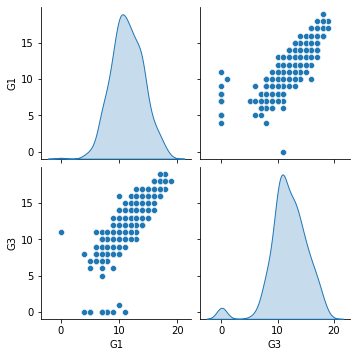

In [33]:
sns.pairplot(uniporData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],diag_kind='kde')

Splitting Data

In [38]:
# 80-20 train-test percent split

trainDataset = uniporData.sample(frac=0.8, random_state=0) 
testDataset = uniporData.drop(trainDataset.index)

print(trainDataset.head(),'\n')
print(trainDataset.shape,'\n')

print(testDataset.head(),'\n')
print(testDataset.shape)

     G1  G3
532   9   8
375  14  15
306  15  16
625  10  10
480   9  10 

(519, 2) 

    G1  G3
9   12  13
11  10  13
19  12  12
23  10  10
25  10  12 

(130, 2)


In [39]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

# training & testing feature will be G1
# And the labels variable will be G3
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

532     8
375    15
306    16
625    10
480    10
Name: G3, dtype: int64
9     13
11    13
19    12
23    10
25    12
Name: G3, dtype: int64


In [41]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
532   9
375  14
306  15
625  10
480   9
    G1
9   12
11  10
19  12
23  10
25  10


In [42]:
model = tf.keras.Sequential([ tf.keras.layers.Dense(1) ])

In [43]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001), # α = 0.001
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [50]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
17/17 [==============================] - 0s 4ms/step - loss: 1.1939 - mae: 1.1939 - mse: 3.6656 - val_loss: 1.0548 - val_mae: 1.0548 - val_mse: 2.4387
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 1.1937 - mae: 1.1937 - mse: 3.6654 - val_loss: 1.0550 - val_mae: 1.0550 - val_mse: 2.4384
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 1.1948 - mae: 1.1948 - mse: 3.6621 - val_loss: 1.0564 - val_mae: 1.0564 - val_mse: 2.4371
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 1.1936 - mae: 1.1936 - mse: 3.6598 - val_loss: 1.0553 - val_mae: 1.0553 - val_mse: 2.4379
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 1.1933 - mae: 1.1933 - mse: 3.6633 - val_loss: 1.0545 - val_mae: 1.0545 - val_mse: 2.4394
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 1.1939 - mae: 1.1939 - mse: 3.6667 - val_loss: 1.0550 - val_mae: 1.0550 - val_mse: 2.4381
Epoch 7/500
17/17 [===

In [72]:
history

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


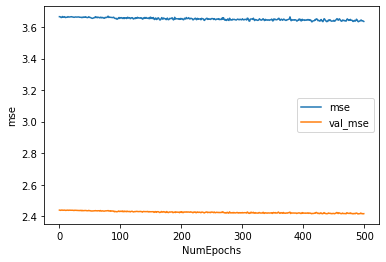

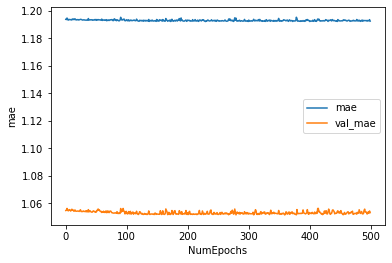

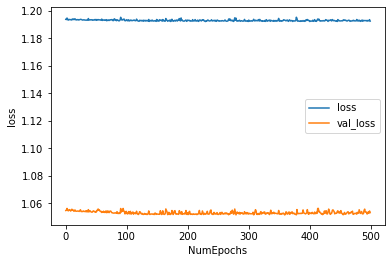

In [79]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()

curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [56]:
print(testFeatures)

     G1
9    12
11   10
19   12
23   10
25   10
..   ..
619  13
627   9
629   7
633  13
639   5

[130 rows x 1 columns]


In [80]:
testPrediction = model.predict(testFeatures).flatten()
print(len(testPrediction))
testPrediction

130


array([12.593635 , 10.833167 , 12.593635 , 10.833167 , 10.833167 ,
       12.593635 , 13.473869 , 14.354103 , 10.833167 , 14.354103 ,
        9.952933 , 16.994806 , 13.473869 , 15.234338 , 14.354103 ,
       13.473869 , 13.473869 , 11.713401 , 12.593635 , 13.473869 ,
       13.473869 , 15.234338 , 14.354103 , 11.713401 , 13.473869 ,
       12.593635 , 12.593635 , 13.473869 , 16.114573 , 14.354103 ,
       12.593635 , 14.354103 , 10.833167 , 10.833167 , 13.473869 ,
       12.593635 , 13.473869 ,  9.072699 ,  9.952933 , 15.234338 ,
       12.593635 ,  9.952933 ,  9.072699 ,  9.952933 ,  9.952933 ,
       12.593635 , 16.114573 ,  9.952933 , 10.833167 , 14.354103 ,
       13.473869 ,  9.952933 , 14.354103 , 13.473869 , 12.593635 ,
       14.354103 ,  9.952933 ,  8.192465 , 10.833167 , 12.593635 ,
       15.234338 , 14.354103 , 11.713401 , 12.593635 , 11.713401 ,
       10.833167 , 12.593635 , 12.593635 , 11.713401 , 11.713401 ,
       16.114573 ,  9.072699 , 11.713401 , 16.114573 , 13.4738

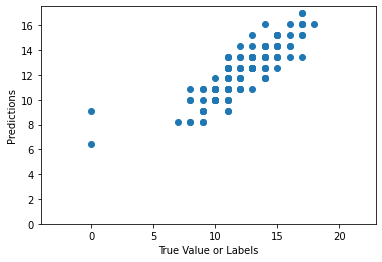

In [81]:
# to check how well the model predicts across the actual labels

plt.scatter(testLabels, testPrediction)
plt.ylabel('Predictions')
plt.xlabel('True Value or Labels')
plt.axis('equal')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.show()


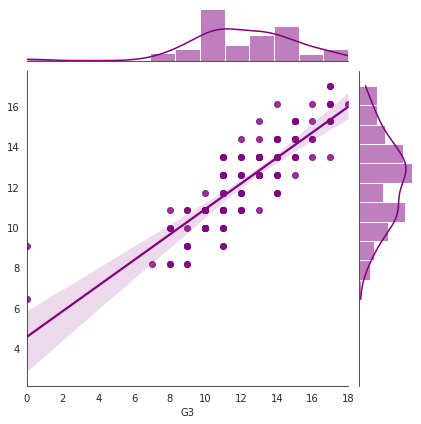

In [102]:
with sns.axes_style('white'):
    sns.jointplot(x=testLabels,y=testPrediction, kind='reg',color='purple')

Predicted values have ↑ error for lower values of G3 ( < 4 )

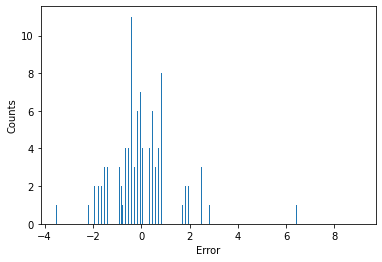

In [82]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPrediction, testLabels, numEpochs)

Bell shape curve centred at x=0 ;

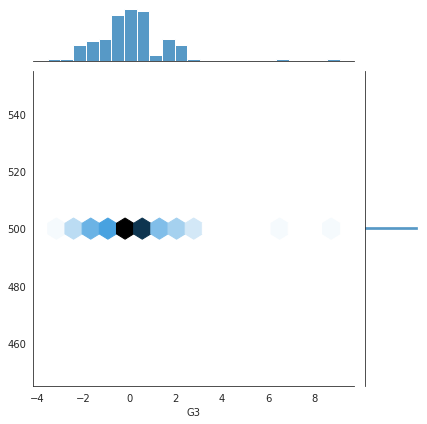

In [89]:
error = testPrediction - testLabels
with sns.axes_style('white'):
    sns.jointplot(x=error,y=numEpochs, kind='hex')


In [103]:
# Using the model to predict values
list_of_G1_values=[5,7,12,3]
model.predict(list_of_G1_values).flatten()

array([ 6.4319963,  8.192465 , 12.593635 ,  4.671528 ], dtype=float32)

Database citation:
>P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

[Link to the database](https://archive.ics.uci.edu/ml/datasets/Student+Performance)



